In [1]:
clc; clear; close all;

% -------------------------------------------------------------
% Step 1: Load an inbuilt MATLAB image
% -------------------------------------------------------------
img = imread('peppers.png');       % Example built-in image
img = im2double(img);              % Convert to double for processing

% Get the size
[rows, cols, ch] = size(img);

% Reshape image into N x 3 matrix (each pixel is a 3D point: R,G,B)
pixels = reshape(img, rows*cols, 3);

% -------------------------------------------------------------
% Step 2: Choose number of clusters K
% -------------------------------------------------------------
K = 6;   % You can change this to 4, 5, etc.

% -------------------------------------------------------------
% Step 3: Initialize cluster centers randomly
% -------------------------------------------------------------
rand_idx = randperm(size(pixels,1), K);
centers = pixels(rand_idx, :);      % K initial centers (RGB values)

% To store cluster assignments
cluster_idx = zeros(size(pixels,1), 1);

% -------------------------------------------------------------
% Step 4: K-Means Iteration Loop
% -------------------------------------------------------------
max_iters = 20;

for iter = 1:max_iters
    fprintf('Iteration %d\n', iter);

    % -----------------------------------------
    % Step 4.1: Assign each pixel to nearest center
    % -----------------------------------------
    for i = 1:size(pixels,1)
        % Compute distance to each center (Euclidean)
        dists = sum((centers - pixels(i,:)).^2, 2);

        % Assign pixel to closest cluster
        [~, cluster_idx(i)] = min(dists);
    end

    % -----------------------------------------
    % Step 4.2: Update cluster centers
    % -----------------------------------------
    new_centers = zeros(K, 3);
    for k = 1:K
        % Get all pixels belonging to cluster k
        cluster_pixels = pixels(cluster_idx == k, :);

        % Avoid empty clusters
        if ~isempty(cluster_pixels)
            new_centers(k, :) = mean(cluster_pixels, 1);
        else
            new_centers(k, :) = centers(k, :);
        end
    end

    % Check for convergence (centers not changing)
    if max(abs(new_centers - centers), [], 'all') < 1e-5
        disp('Converged.');
        break;
    end

    centers = new_centers; % Update centers
end

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20


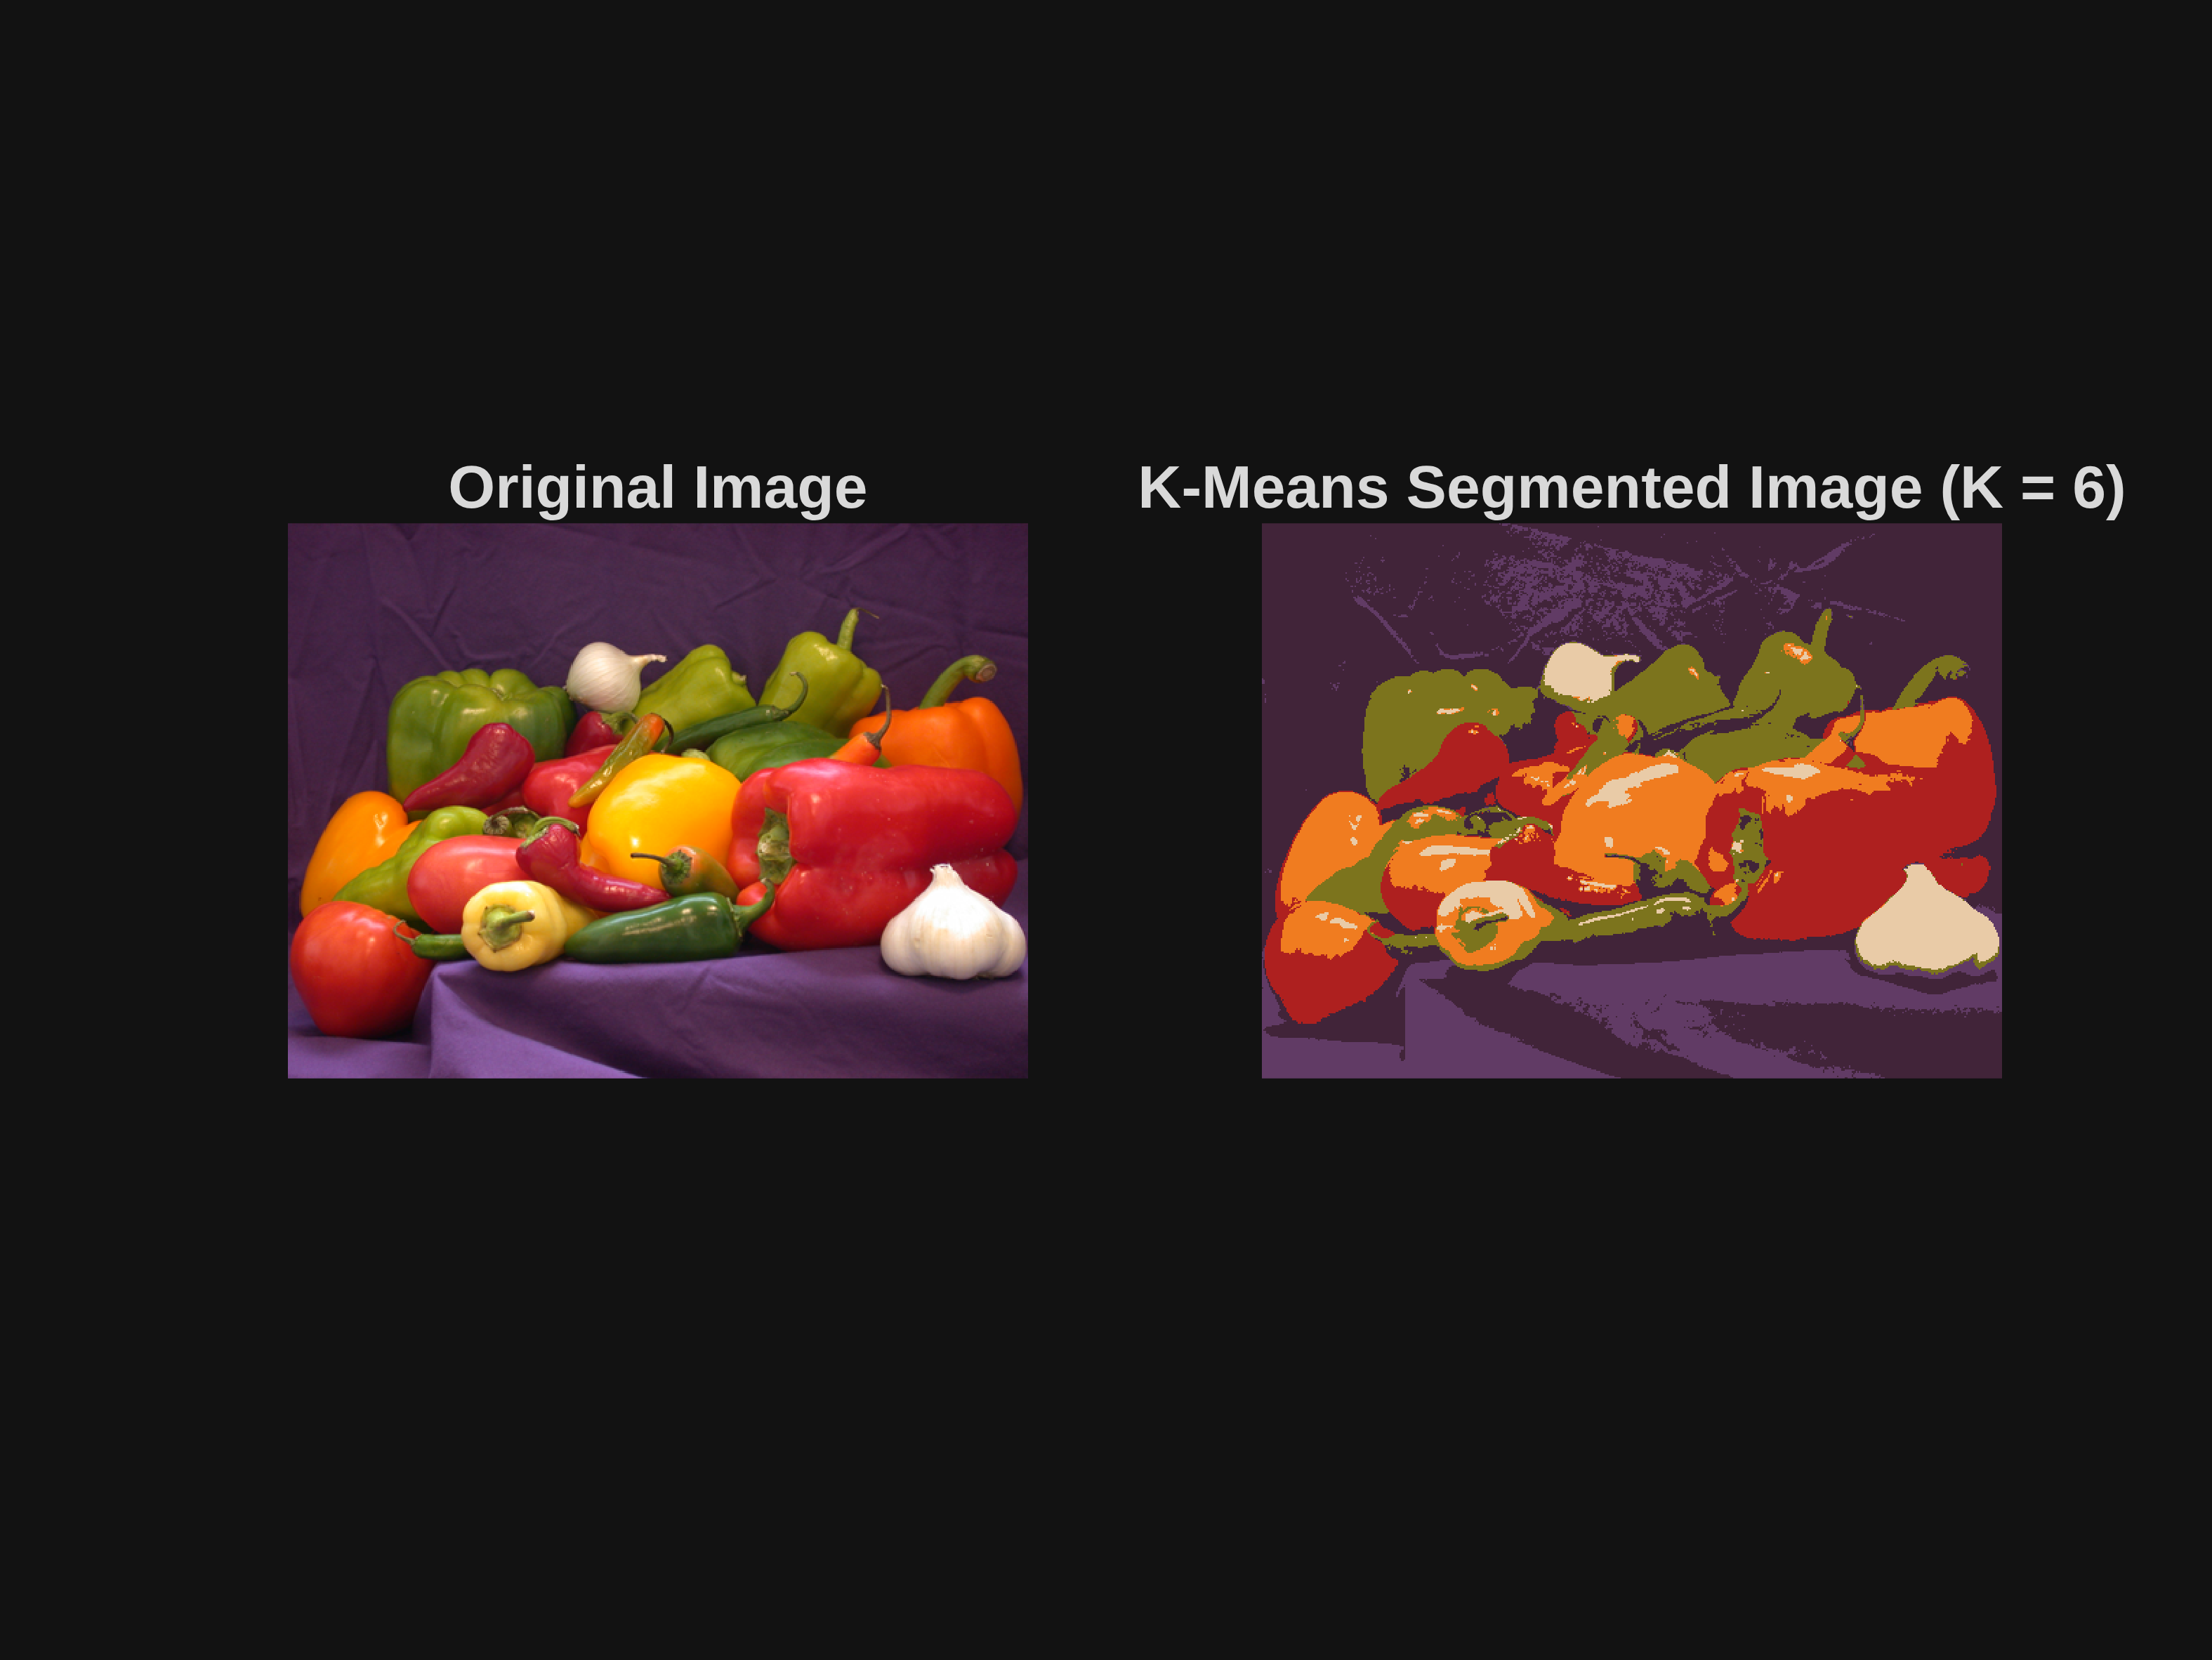

In [2]:

% -------------------------------------------------------------
% Step 5: Reconstruct segmented image using final cluster centers
% -------------------------------------------------------------
segmented_pixels = zeros(size(pixels));

for k = 1:K
    segmented_pixels(cluster_idx == k, :) = repmat(centers(k,:), sum(cluster_idx == k), 1);
end

% Reshape back to image format
segmented_img = reshape(segmented_pixels, rows, cols, 3);

% -------------------------------------------------------------
% Step 6: Display Results
% -------------------------------------------------------------
figure;
subplot(1,2,1);
imshow(img);
title('Original Image');

subplot(1,2,2);
imshow(segmented_img);
title(['K-Means Segmented Image (K = ' num2str(K) ')']);